In [31]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wine=pd.read_csv(r"C:\Users\Milan\Downloads\Knight_MLAssignment\Knight\Data\train.csv",delimiter=",")

# having a look at the dataframes 

print(wine.head(1))
print('\n')
wine.describe()

  user_name    country                                       review_title  \
0       NaN  Australia  Andrew Peace 2007 Peace Family Vineyard Chardo...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   

   points  price         province                 region_1 region_2  \
0      83   10.0  Australia Other  South Eastern Australia      NaN   

         winery     variety  
0  Andrew Peace  Chardonnay  




,points,price
count,82655.000000,77086.000000
mean,88.544553,36.922528
std,3.099670,43.698862
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [32]:
wine.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

Pinot Noir                    10587
Chardonnay                     9402
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1447
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

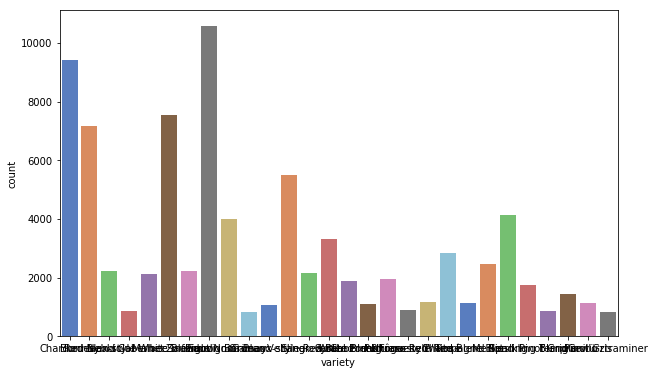

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["variety"], palette="muted")
wine["variety"].value_counts()

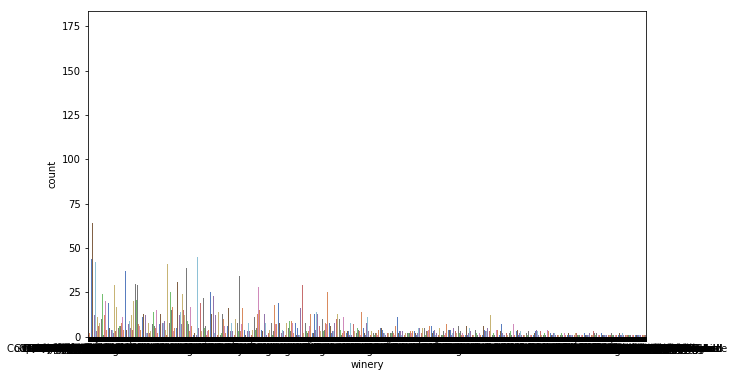

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["winery"], palette="muted")

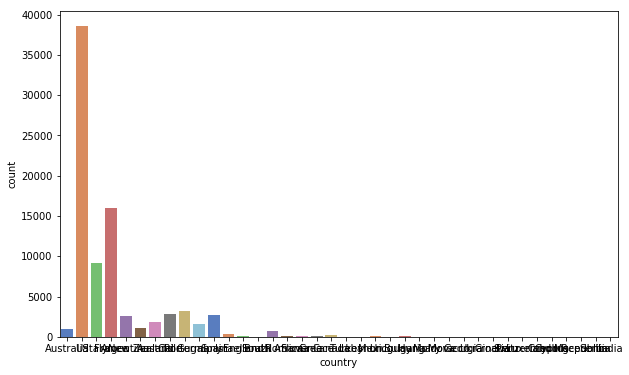

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["country"], palette="muted")

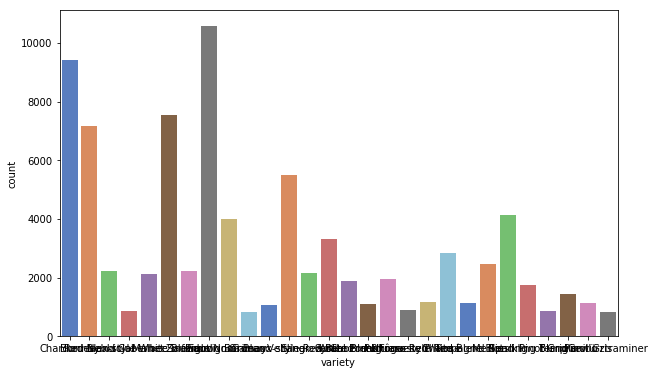

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["variety"], palette="muted")

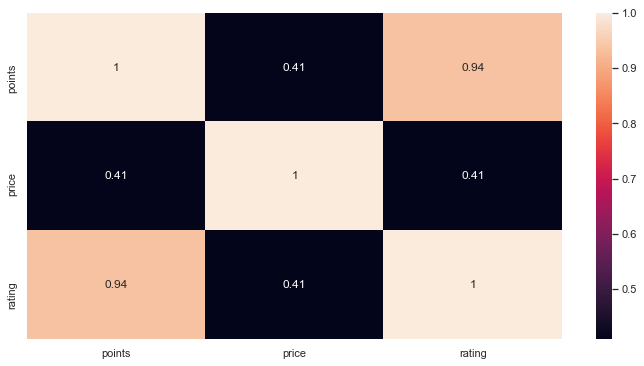

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True)

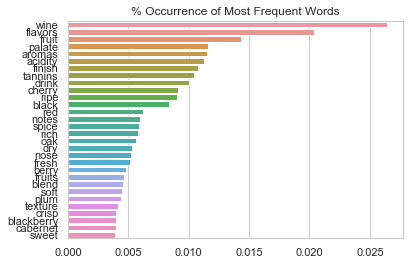

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

wine["cleaned_description"] = wine["review_description"].apply(clean_description)

word_occurrence = wine["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

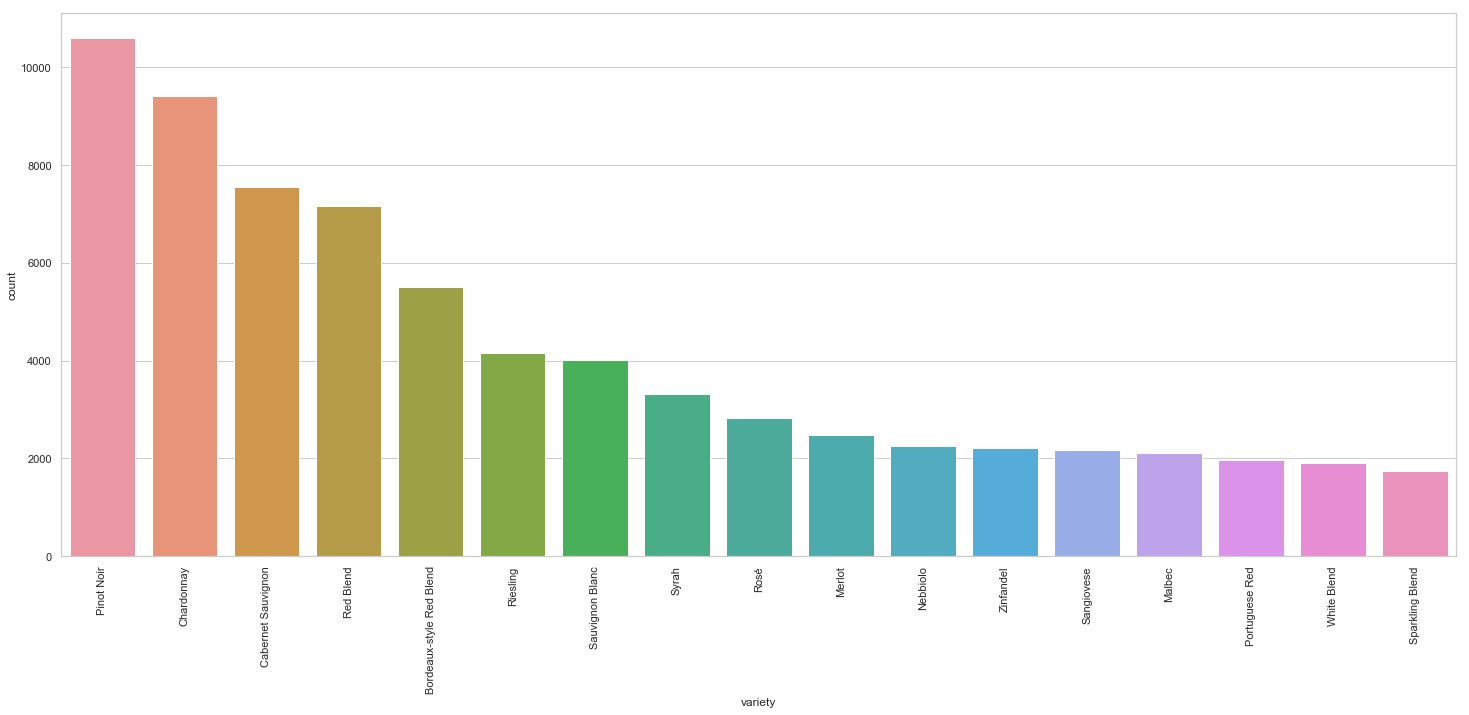

In [74]:
variety_df = wine.groupby('variety').filter(lambda x: len(x) > 1500)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [75]:
variety_df['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo', 'Malbec',
       'Cabernet Sauvignon', 'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Sangiovese', 'Syrah', 'White Blend',
       'Portuguese Red', 'Rosé', 'Merlot', 'Riesling', 'Sparkling Blend'],
      dtype=object)

# NLP

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = variety_df['review_description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [80]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82655 entries, 0 to 82654
Data columns (total 14 columns):
user_name              63262 non-null object
country                82620 non-null object
review_title           82655 non-null object
review_description     82655 non-null object
designation            59009 non-null object
points                 82655 non-null int64
price                  77086 non-null float64
province               82620 non-null object
region_1               69901 non-null object
region_2               35949 non-null object
winery                 82655 non-null object
variety                82655 non-null object
cleaned_description    82655 non-null object
rating                 82655 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 8.8+ MB


In [81]:
word_features = vectorizer.get_feature_names()
word_features[550:575]

['abundant',
 'abundantly',
 'abused',
 'abuzz',
 'abv',
 'acacia',
 'academic',
 'acadia',
 'acai',
 'accelerates',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptability',
 'acceptable',
 'acceptance',
 'access',
 'accesses',
 'accessibile']

In [82]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]


In [83]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


["'s",
 "a'",
 "a'plenti",
 'aa',
 'aand',
 'aaron',
 'abacela',
 'abad',
 'abadia',
 'abandon',
 'abat',
 'abbey',
 'abboccato',
 'abbot',
 'abbott',
 'abbrevi',
 'abc',
 'abeill',
 'abeja',
 'abernathi',
 'aberr',
 'abey',
 'abid',
 'abil',
 'abilio',
 'abiou',
 'abl',
 'abli',
 'abondant',
 'abound',
 'abouriou',
 'abov',
 'abovd',
 'abras',
 'abreu',
 'abri',
 'abrigo',
 'abroad',
 'abrupt',
 'abruzzo',
 'absberg',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abtsberg',
 'abund',
 'abus',
 'abuzz',
 'abv']

In [86]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

c:\users\milan\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    

In [ ]:
variety_df['cluster'] = kmeans.labels_

In [ ]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

# USING DESCRIPTION

In [39]:
import pandas as pd
import numpy as np

from keras.models import Model, load_model
from keras.layers import Dense, Embedding, Input, Activation, CuDNNGRU, Bidirectional, Dropout, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(wine["review_description"], y, test_size = 0.05)

In [60]:
my_input_data = wine['review_description']
my_output_data = wine['variety']

In [61]:
print ('There are %d varieties of wines in this dataset' % len(set(my_output_data)))

There are 28 varieties of wines in this dataset


In [62]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(my_output_data)
my_output_data

array([ 5, 17, 11, ...,  6,  0,  3])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
sw = stopwords.words('english')
input_data = input_data.str.lower()

list_aux = []
for phase_word in my_input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
my_input_data = list_aux
countVectorizer = CountVectorizer()
my_input_data = countVectorizer.fit_transform(my_input_data)
X_train, X_test, y_train, y_test = train_test_split(my_input_data, my_output_data, test_size=0.2) 
countVectorizer = CountVectorizer()
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, verbose=1)



print ('The accuracy of the model is %s' % scores[1])